# ECU init

In [28]:
import ecumene as ecu
import time
import json
import math
import re
import numpy as np
from matplotlib import pyplot as plt


def input_combinations(dict_of_ranges):

    list_of_ranges=[]

    for param_name, list_of_values in dict_of_ranges.items():

        list_of_ranges+=[[{param_name: value} for value in list_of_values]]

    list_of_combinations=[list(item) for item in product(*list_of_ranges)]

    list_of_combinations=[reduce(lambda x,y: {**x,**y}, combination) for combination in list_of_combinations]
    
    return(list_of_combinations)

In [4]:
MDN=ecu.Ecumene('MDN', 'load')

In [15]:
MDN.add_parameter_values('strategy_type', ['scenario_based_active'])

In [16]:
MDN.glossary

{'meta': [['datatype',
   ['durations', 'fidelity_trajectories', 'state_trajectories']],
  ['store_mode', ['write', 'update_list', 'update_dictionary']]],
 'data': [['target', ['AKLT', 'W']],
  ['system_size', [3, 4, 5, 6]],
  ['target_accuracy', [0.01]],
  ['strategy_type',
   ['passive', 'cost_function_active', 'scenario_based_active']]]}

In [215]:
sim_ids=[{'datatype': 'state_trajectories',
 'store_mode': 'update_list',
 'target': 'W',
 'system_size': 3,
 'target_accuracy': 0.01,
 'strategy_type': 'passive'}]

number_of_workers=[200]

In [206]:
sim_ids=[{'datatype': 'state_trajectories',
 'store_mode': 'update_list',
 'target': 'W',
 'system_size': 3,
 'target_accuracy': 0.01,
 'strategy_type': 'scenario_based_active'}]




number_of_workers=[200]

In [204]:
!squeue

             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
            451465   ibIntel sys/dash    lemut  R 4-05:28:48      1 maris079
            459876 compIntel sys/dash    bonet  R    6:36:20      1 maris076
          461984_0   ibIntel DOS_DATA    lemut  R       3:48      1 maris079
          461984_1   ibIntel DOS_DATA    lemut  R       3:48      1 maris079
          461984_2   ibIntel DOS_DATA    lemut  R       3:48      1 maris079
          461984_3   ibIntel DOS_DATA    lemut  R       3:48      1 maris079
          461984_4   ibIntel DOS_DATA    lemut  R       3:48      1 maris079
          461984_5   ibIntel DOS_DATA    lemut  R       3:48      1 maris079
          461984_6   ibIntel DOS_DATA    lemut  R       3:48      1 maris079
          461984_7   ibIntel DOS_DATA    lemut  R       3:48      1 maris079
          461984_8   ibIntel DOS_DATA    lemut  R       3:48      1 maris079
          461984_9   ibIntel DOS_DATA    lemut  R       3:48      1 

In [199]:
cpus=!sinfo -o "%C " -N -n maris[051,053,069,070,072,073,076-079,080-085] -p compIntel,ibIntel,compAMD
cpus=cpus[1:]

pattern=re.compile(r"(\d+)[/](\d+)[/](\d+)[/](\d+)")

cpus=(sum([eval(pattern.match(line).group(1)) for line in cpus]), sum([eval(pattern.match(line).group(2)) for line in cpus]))

cpus

(173, 803)

In [216]:
target_datasize=10000

for sim_number, sim_id in enumerate(sim_ids):
    
    try:
        current_datasize=len(MDN.load_data(sim_id))
    except:
        current_datasize=0

    
    time_stamp=time.time()
    
    
    
    
    slurm_code='#!/bin/env bash'
    slurm_code+=f'\n#SBATCH --array=0-{number_of_workers[sim_number]-1}'
    slurm_code+='\n#SBATCH --error="./out/MDN/%x-%j-%a.err"'
    slurm_code+='\n#SBATCH --output="./out/MDN/%x-%j-%a.out"'
#     slurm_code+='\n#SBATCH --nodelist=maris[072]'
    slurm_code+='\n#SBATCH --partition=compAMD,compIntel,ibIntel'
    slurm_code+='\n#SBATCH --exclude=maris[064],maris[048]'
    slurm_code+='\n#SBATCH --mem=10G'
    slurm_code+='\n#SBATCH --time=02-00:00:00'
    slurm_code+='\n#SBATCH --mail-type=END,FAIL'
    slurm_code+='\n'
    slurm_code+='\n. ~/.bashrc'
    slurm_code+='\nsrun /home/herasymenko/python_virt_envs/qsimcirq/bin/python3 AKLT_script.py '
    slurm_code+=f'{time_stamp} '
    slurm_code+=f'{math.ceil((target_datasize-current_datasize)/number_of_workers[sim_number])} '
    slurm_code+='${SLURM_ARRAY_TASK_ID}'
    
    

    slurm_filename=f'slurm_history/MDN_{time_stamp}_slurm.sh'
    
    

    

    with open(slurm_filename, 'w') as sfl:
        sfl.write(slurm_code)



    sim_filename=f'simulation_history/{time_stamp}_sim'

    with open(sim_filename, 'w') as sfl:
        json.dump(json.dumps(sim_id), sfl)

    !sbatch $slurm_filename

Submitted batch job 462124


## Collecting postfixes

In [217]:
for sim_number, sim_id in enumerate(sim_ids):

    MDN.collect_postfixes(sim_id)

List does not exist yet!
Collected item 0 from postfixed data! Removing the postfixed data...
Collected item 1 from postfixed data! Removing the postfixed data...
Collected item 2 from postfixed data! Removing the postfixed data...
Collected item 3 from postfixed data! Removing the postfixed data...
Collected item 4 from postfixed data! Removing the postfixed data...
Collected item 5 from postfixed data! Removing the postfixed data...
Collected item 6 from postfixed data! Removing the postfixed data...
Collected item 7 from postfixed data! Removing the postfixed data...
Collected item 8 from postfixed data! Removing the postfixed data...
Collected item 9 from postfixed data! Removing the postfixed data...
Collected item 10 from postfixed data! Removing the postfixed data...
Collected item 11 from postfixed data! Removing the postfixed data...
Collected item 12 from postfixed data! Removing the postfixed data...
Collected item 13 from postfixed data! Removing the postfixed data...
Colle

Collected item 117 from postfixed data! Removing the postfixed data...
Collected item 118 from postfixed data! Removing the postfixed data...
Collected item 119 from postfixed data! Removing the postfixed data...
Collected item 120 from postfixed data! Removing the postfixed data...
Collected item 121 from postfixed data! Removing the postfixed data...
Collected item 122 from postfixed data! Removing the postfixed data...
Collected item 123 from postfixed data! Removing the postfixed data...
Collected item 124 from postfixed data! Removing the postfixed data...
Collected item 125 from postfixed data! Removing the postfixed data...
Collected item 126 from postfixed data! Removing the postfixed data...
Collected item 127 from postfixed data! Removing the postfixed data...
Collected item 128 from postfixed data! Removing the postfixed data...
Collected item 129 from postfixed data! Removing the postfixed data...
Collected item 130 from postfixed data! Removing the postfixed data...
Collec

## Loading and plotting

In [289]:
from matplotlib.figure import Figure
from matplotlib.ticker import MaxNLocator

import matplotlib.font_manager as font_manager

from matplotlib import rc
from matplotlib import rcParams

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

rcParams['font.size'] = 30

In [162]:
durs=MDN.load_data(sim_ids[0])

In [222]:
np.std(durs)/np.sqrt(len(durs))

41.31019273567797

4509.028727272727


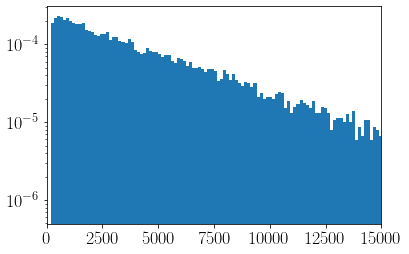

In [246]:
print(np.mean(durs))

plt.hist(durs, 300, density=True)

plt.xlim([0,15000])

plt.yscale('log')

plt.show()

363 and 4430

In [253]:
trajectories=(MDN.load_data(sim_ids[0]))

durs=[len(tr) for tr in trajectories]



for dur in range(4590, 4610):
    try:
        print(dur, durs.index(dur))
    except:
        pass

4593 2157
4597 4382
4601 1046
4605 846
4609 8230


In [269]:
trajectory=np.array(trajectories[2157])

In [291]:
active_subspace_trajectory

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [156]:
# active_subspace_trajectory=subspace_trajectory

In [270]:
passive_subspace_trajectory=trajectory

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


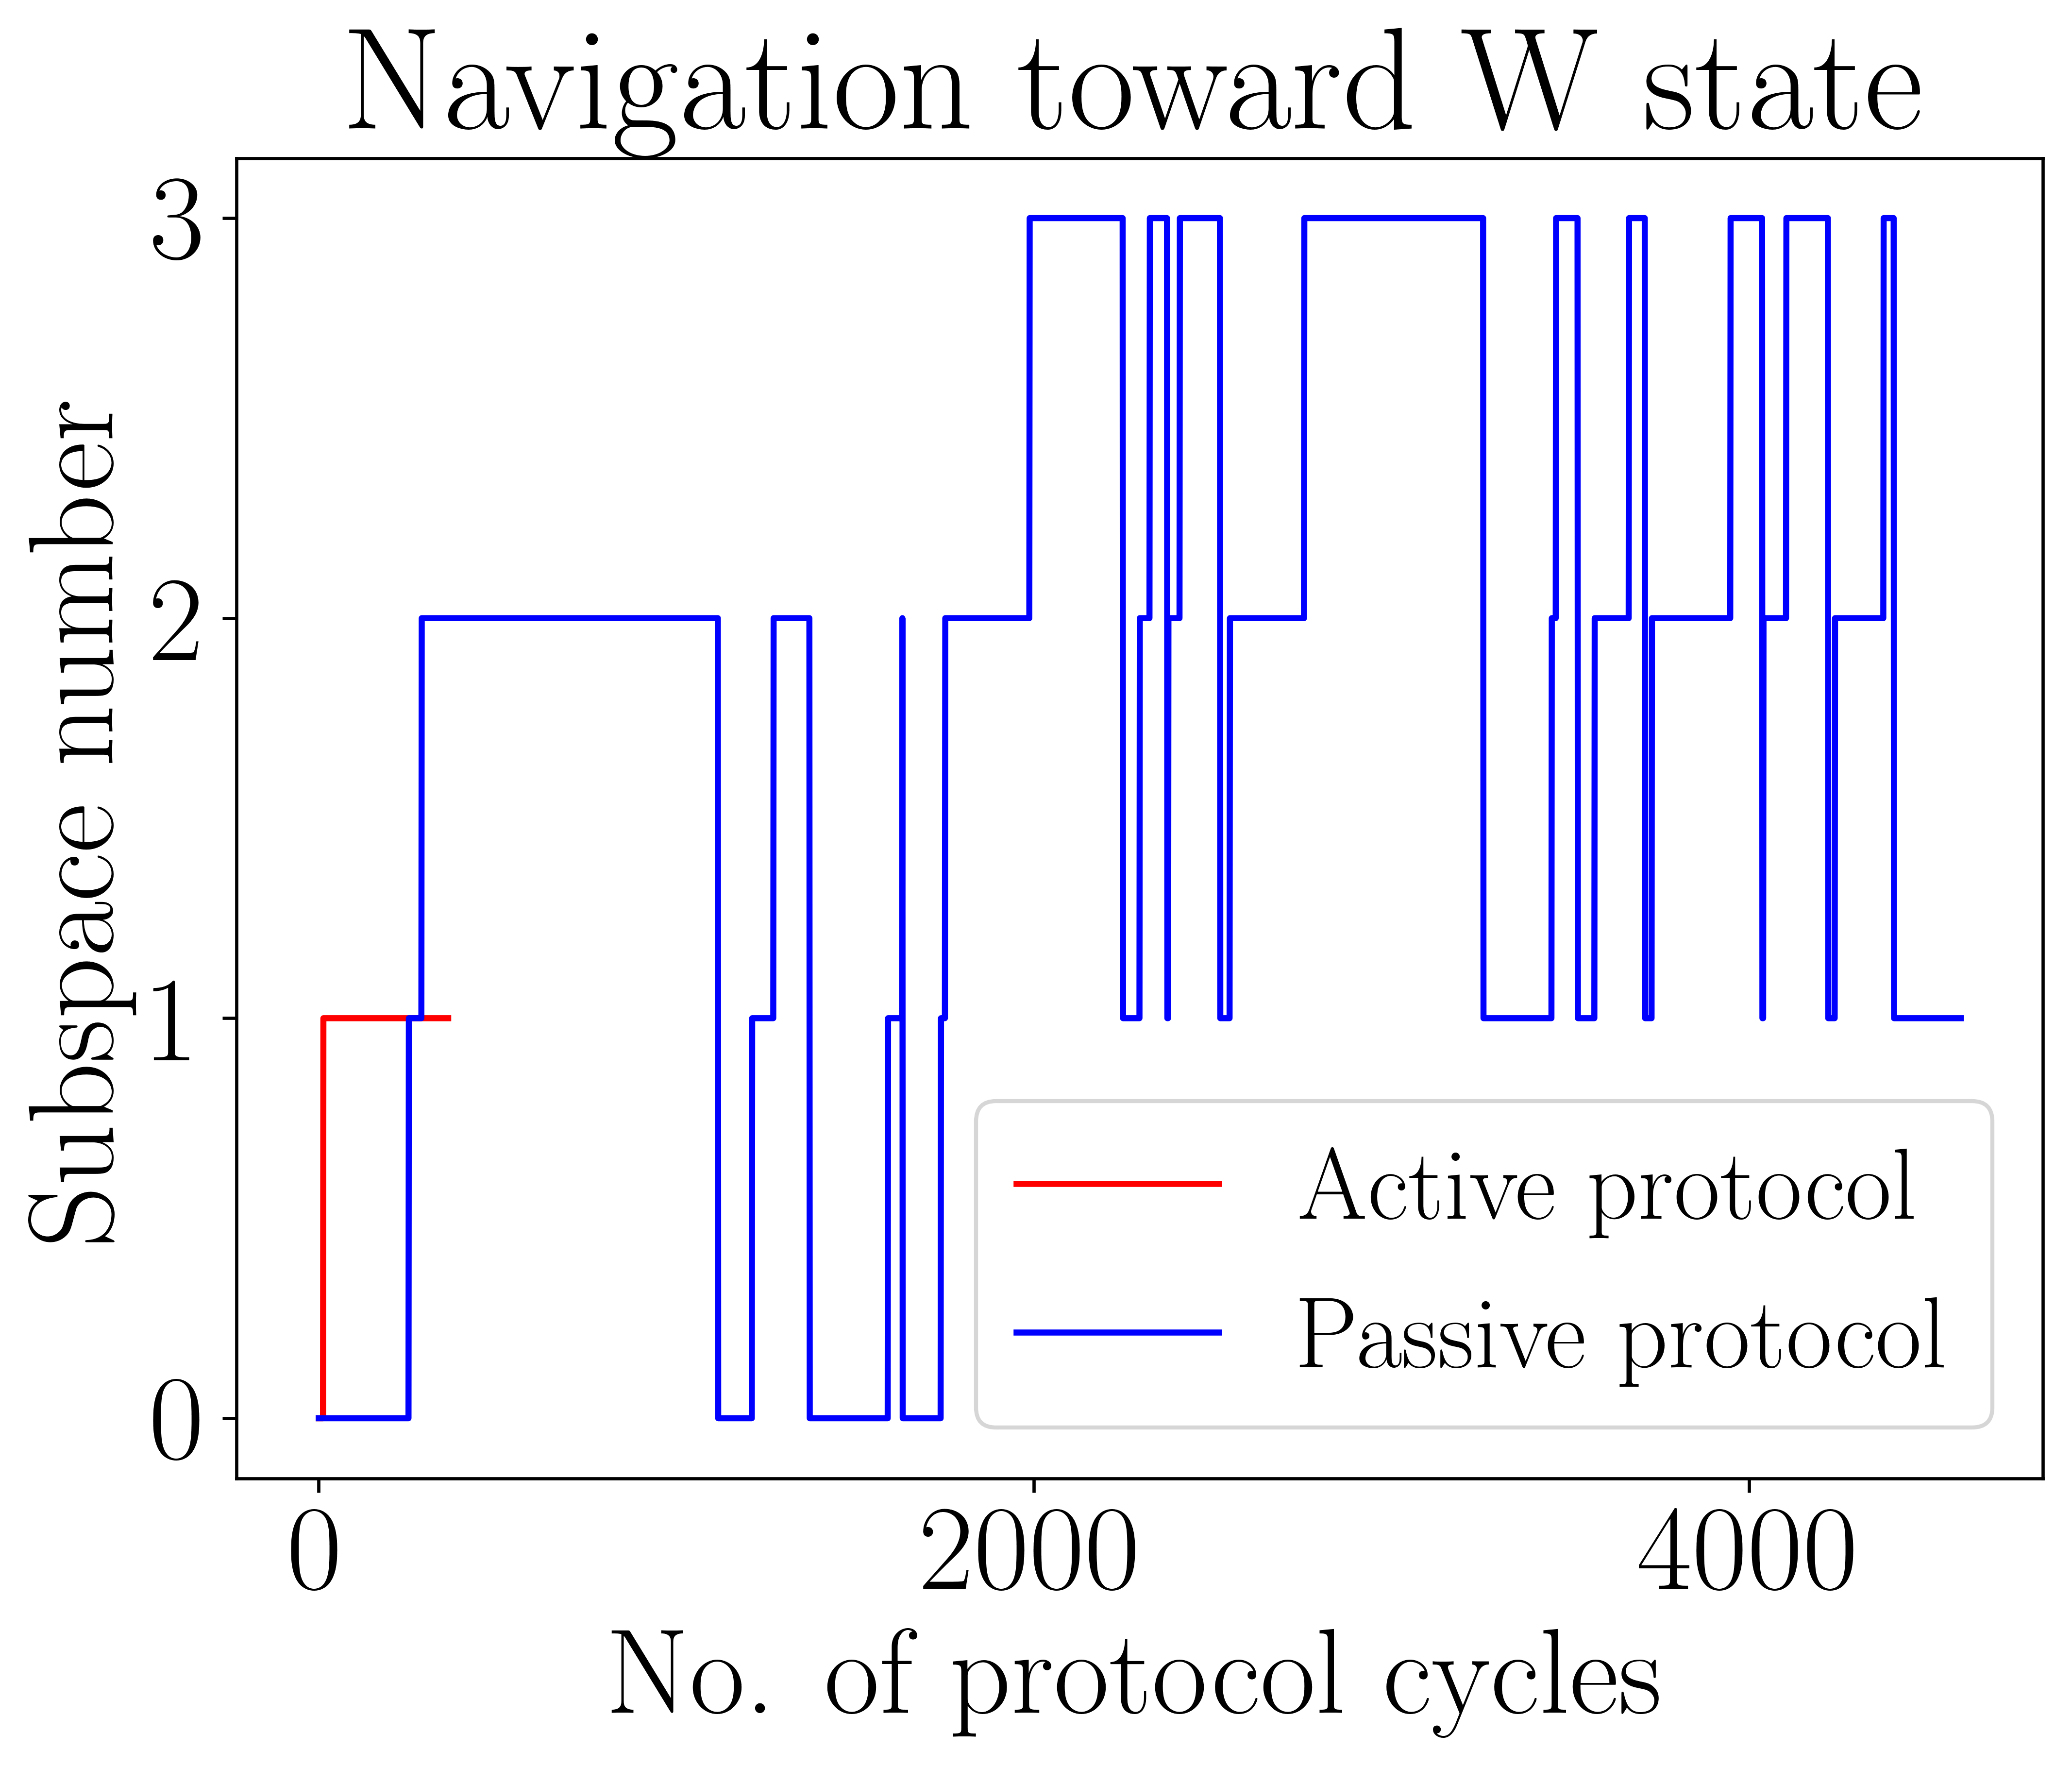

In [290]:


fig, ax = plt.subplots(1,1, figsize=(8,6), dpi=600)

ax.yaxis.set_major_locator(MaxNLocator(integer=True))

ax.plot(active_subspace_trajectory, color='red', label='Active protocol')
ax.plot(passive_subspace_trajectory, color='blue', label='Passive protocol')

ax.set_ylabel('Subspace number')

ax.set_xlabel('No. of protocol cycles')

ax.set_title('Navigation toward W state')

# plt.xscale('log')

# plt.tight_layout()

ax.legend(loc='lower right', prop=font_manager.FontProperties(
                                   family='serif', size=25))

plt.show()



fig.savefig('figures/W_trajectory.pdf')

In [83]:
subspace_densities

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       ...,
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.]])